In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize as NormColor
sys.path.append(".")
import HOD

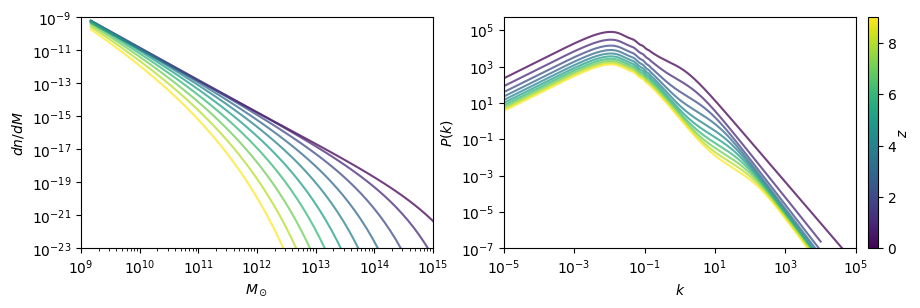

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharex=False, sharey=False)
z_display = np.array([0,1,2,3,4,5,6,7,8,9])
color = iter(cm.viridis(np.linspace(0,1,len(z_display))))
for z in z_display:
    hmf_mass, hmf_dndm, hmf_nu, hmf_k, hmf_PS = HOD.init_lookup_table(z, REWRITE_TBLS = True)
    _col_ = next(color)
    ax[0].plot(hmf_mass, hmf_dndm, c = _col_, ls = '-', alpha=0.75)
    ax[1].plot(hmf_k   , hmf_PS  , c = _col_, ls = '-', alpha=0.75)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel(r'$M_\odot$')
ax[0].set_ylabel(r'$dn/dM$')
ax[0].set_xlim((1e9,1e15))
ax[0].set_ylim((1e-23,1e-9))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel(r'$k$')
ax[1].set_ylabel(r'$P(k)$')
ax[1].set_xlim((1e-5,1e5))
ax[1].set_ylim((1e-7,5e5))
p0 = ax[1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([0.912, 0.11, 0.01, 0.77])
norm = NormColor(vmin=np.min(z_display),vmax=np.max(z_display))
s_m = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
s_m.set_array([])
cbar = plt.colorbar(s_m, cax=ax_cbar)
cbar.set_label(r'$z$', labelpad=0)
plt.show()

In [41]:
z = 9.4
M_sat, M_min, sigma_logM, alpha = 10**12.0, 10**11.0, 0.2, 1.0
data = [(z-0.2, 1/3),(z, 1/3),(z+0.2, 1/3)]
z_array, N_z_nrm = np.array(data).T

th_arr = np.logspace(-0.5, 3.5, 21)
o1, o2 = HOD.omega(th_arr/206265, M_min, sigma_logM, M_sat, alpha, N_z_nrm, z_array, REWRITE_TBLS=0)

Calculating HMF table at redshift 0.00
Calculating HMF table at redshift 9.20
Calculating HMF table at redshift 9.40
Calculating HMF table at redshift 9.60


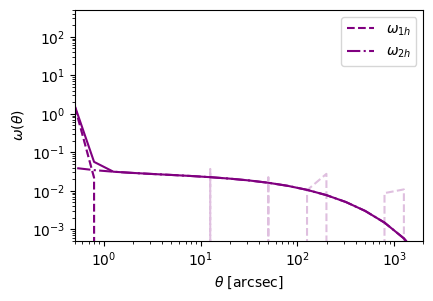

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3), sharex=False, sharey=False)
_o1 = np.copy(o1)
_o1[_o1<0] = 0
_o1[th_arr>=10] = 0
ax.plot(th_arr, _o1+o2, c = 'purple', ls = '-')
ax.plot(th_arr, _o1, c = 'purple', ls = '--', label=r'$\omega_{1h}$')
ax.plot(th_arr, o2, c = 'purple', ls = '-.', label=r'$\omega_{2h}$')
ax.plot(th_arr, o1, c = 'purple', ls = '--', alpha=0.25)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim((0.5,2e3))
ax.set_ylim((5e-4, 5e2))
ax.set_xlabel(r'$\theta$ [arcsec]')
ax.set_ylabel(r'$\omega$($\theta$)')
plt.legend()
plt.show()